In [1]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.collocations import *
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
da_ny = pd.read_csv('jobs_1.csv')
ba_ny = pd.read_csv('jobs_2.csv')
ds_ny = pd.read_csv('jobs_3.csv')
de_ny = pd.read_csv('jobs_4.csv')
da_bo = pd.read_csv('jobs_5.csv')
ba_bo = pd.read_csv('jobs_6.csv')
ds_bo = pd.read_csv('jobs_7.csv')
de_bo = pd.read_csv('jobs_8.csv')
da_ch = pd.read_csv('jobs_9.csv')
ba_ch = pd.read_csv('jobs_10.csv')
ds_ch = pd.read_csv('jobs_11.csv')
de_ch = pd.read_csv('jobs_12.csv')
ds_main = pd.concat([da_ny,ba_ny,ds_ny,de_ny,da_bo,ba_bo,ds_bo,de_bo,da_ch,ba_ch,ds_ch,de_ch],ignore_index=True)

In [4]:
summary=ds_main['summary']

In [9]:
summary = summary.apply(lambda x: " ".join(x.lower() for x in x.split()))
summary = summary.str.replace('[^\w\s]','')

In [11]:
stop = stopwords.words('english')
summary = summary.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
summary.head()

0    health care data analyst collect compile organ...
1    knack data familiarity combining manipulating ...
2    financial firm nyc seeking administrative anal...
3    perform data loads data extracts conversions m...
4    looking fulltime data analyst assist large ong...
Name: summary, dtype: object

In [12]:
freq = pd.Series(' '.join(summary).split()).value_counts()[:10]
freq

data          5371
business      2378
analyst       1481
experience     976
years          627
engineer       625
team           593
analysis       518
learning       507
engineers      483
dtype: int64

In [16]:
freq = pd.Series(' '.join(summary).split()).value_counts()[-10:]
freq

condition        1
offering         1
pc               1
interpersonal    1
union            1
datagx           1
startups         1
railroad19       1
chartis          1
forhire          1
dtype: int64

In [17]:
freq = list(freq.index)
summary = summary.apply(lambda x: " ".join(x for x in x.split() if x not in freq))
summary.head()

0    health care data analyst collect compile organ...
1    knack data familiarity combining manipulating ...
2    financial firm nyc seeking administrative anal...
3    perform data loads data extracts conversions m...
4    looking fulltime data analyst assist large ong...
Name: summary, dtype: object

In [18]:
TextBlob(summary[1]).words

WordList(['knack', 'data', 'familiarity', 'combining', 'manipulating', 'data', 'tables', 'data', 'sets', 'joins', 'unions', 'etc', 'construct', 'data', 'sets', 'required', 'analysis'])

In [20]:
TextBlob(summary[0]).ngrams(3)

[WordList(['health', 'care', 'data']),
 WordList(['care', 'data', 'analyst']),
 WordList(['data', 'analyst', 'collect']),
 WordList(['analyst', 'collect', 'compile']),
 WordList(['collect', 'compile', 'organize']),
 WordList(['compile', 'organize', 'health']),
 WordList(['organize', 'health', 'care']),
 WordList(['health', 'care', 'data']),
 WordList(['care', 'data', 'include']),
 WordList(['data', 'include', 'medical']),
 WordList(['include', 'medical', 'data']),
 WordList(['medical', 'data', 'financial']),
 WordList(['data', 'financial', 'data'])]

In [23]:
#tokens = nltk.word_tokenize(summary)
type(summary)

pandas.core.series.Series

In [24]:
docs=(summary.tolist())
summary_text = ''.join(docs)

In [26]:
tokens = nltk.word_tokenize(summary_text)

In [40]:
print(len(tokens))

58197


In [41]:
tokens_pos_tag = nltk.pos_tag(tokens)

In [42]:
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))

In [43]:
pos_df.head()

,word,POS
0,health,NN
1,care,NN
2,data,NNS
3,analyst,NN
4,collect,VBP


In [44]:
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags

In [45]:
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,POS,word
10,NN,22317
12,NNS,13215
6,JJ,9102
21,VBG,4390
23,VBP,3246
15,RB,1395
2,CD,800
24,VBZ,743
20,VBD,688
19,VB,677


In [46]:
filtered_pos = [ ]

In [47]:
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)

In [48]:
print (len(filtered_pos))

35567


In [49]:
fdist_pos = nltk.FreqDist(filtered_pos)

In [50]:
top_100_words = fdist_pos.most_common(100)

In [51]:
print(top_100_words)

[(('data', 'NNS'), 4269), (('business', 'NN'), 2026), (('analyst', 'NN'), 1426), (('years', 'NNS'), 626), (('experience', 'NN'), 555), (('machine', 'NN'), 460), (('engineer', 'NN'), 446), (('analysis', 'NN'), 445), (('engineers', 'NNS'), 414), (('team', 'NN'), 407), (('analytics', 'NNS'), 401), (('scientists', 'NNS'), 401), (('systems', 'NNS'), 368), (('development', 'NN'), 305), (('role', 'NN'), 279), (('science', 'NN'), 265), (('support', 'NN'), 264), (('management', 'NN'), 254), (('analysts', 'NNS'), 252), (('solutions', 'NNS'), 242), (('software', 'NN'), 223), (('technology', 'NN'), 215), (('work', 'NN'), 202), (('quality', 'NN'), 199), (('requirements', 'NNS'), 178), (('product', 'NN'), 178), (('join', 'NN'), 172), (('scientist', 'NN'), 158), (('skills', 'NNS'), 149), (('design', 'NN'), 137), (('engineering', 'NN'), 131), (('insights', 'NNS'), 130), (('data', 'NN'), 128), (('process', 'NN'), 127), (('project', 'NN'), 124), (('tools', 'NNS'), 121), (('research', 'NN'), 116), (('min

In [52]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))

In [53]:
top_words_df.head()

,pos,count
0,"(data, NNS)",4269
1,"(business, NN)",2026
2,"(analyst, NN)",1426
3,"(years, NNS)",626
4,"(experience, NN)",555


In [54]:
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS

In [55]:
top_words_df = top_words_df.drop('pos', 1) # drop the previous column

In [ ]:
top_words_df = top_words_df.drop('pos', 1)

In [154]:
subset_pos = top_words_df[['Word', 'count']]

#tuples_pos = subset_pos.to_dict('split')
tuples_pos = [tuple(x) for x in subset_pos.values]
#tuples_pos=dict((x, y) for y, x in tuples_pos)
subset_pos.head()

,Word,count
0,data,4269
1,business,2026
2,analyst,1426
3,years,626
4,experience,555


In [160]:
d=dict(tuples_pos)
d['data'] = 4269
d.items()

dict_items([('data', 4269), ('business', 2026), ('analyst', 1426), ('years', 626), ('experience', 555), ('machine', 460), ('engineer', 446), ('analysis', 445), ('engineers', 414), ('team', 407), ('analytics', 401), ('scientists', 401), ('systems', 368), ('development', 305), ('role', 279), ('science', 265), ('support', 264), ('management', 254), ('analysts', 252), ('solutions', 242), ('software', 223), ('technology', 215), ('work', 202), ('quality', 199), ('requirements', 178), ('product', 178), ('join', 172), ('scientist', 158), ('skills', 149), ('design', 137), ('engineering', 131), ('insights', 130), ('process', 127), ('project', 124), ('tools', 121), ('research', 116), ('mining', 116), ('operations', 113), ('processing', 113), ('health', 108), ('knowledge', 107), ('building', 107), ('information', 105), ('client', 104), ('services', 102), ('position', 101), ('organization', 100), ('techniques', 96), ('visualization', 94), ('ability', 93), ('problems', 93), ('teams', 92), ('report',

In [157]:
wordcloud = WordCloud()

In [158]:
wordcloud.generate_from_frequencies(d)

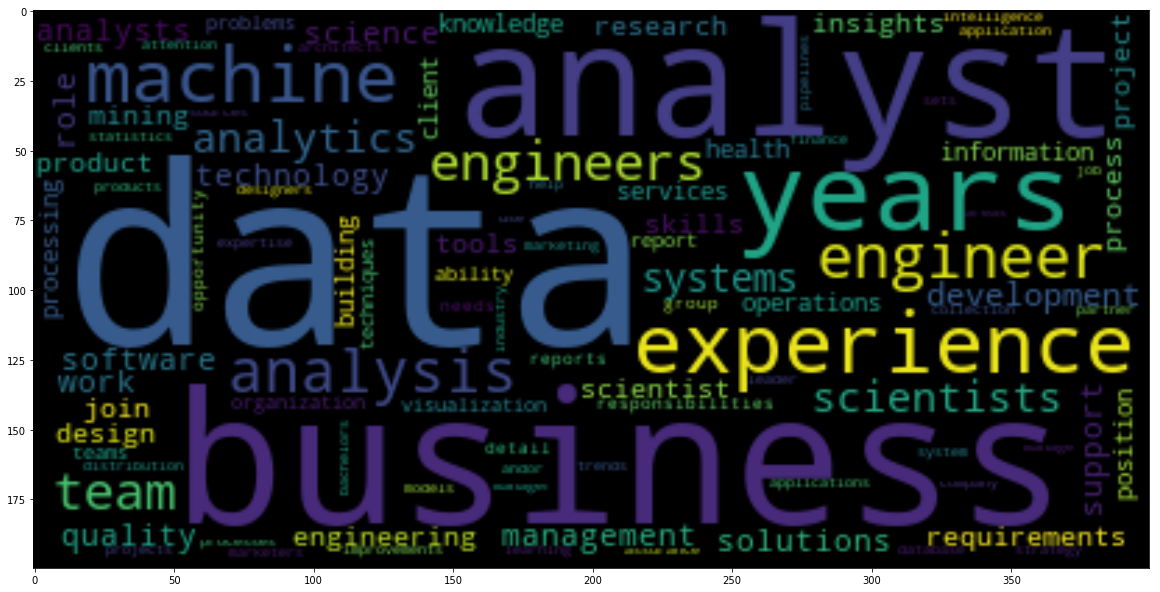

In [159]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

In [161]:
bgs = nltk.bigrams(tokens)

In [162]:
fdist2 = nltk.FreqDist(bgs) # selecting bigrams from tokens

In [163]:
bgs_100 = fdist2.most_common(100) # top-100 bigrams
bgs_df = pd.DataFrame(bgs_100, columns = ('bigram','count'))
bgs_df.head()


,bigram,count
0,"(business, analyst)",504
1,"(machine, learning)",432
2,"(data, scientists)",324
3,"(data, engineer)",318
4,"(data, analyst)",302


In [164]:
bgs_df['phrase'] = bgs_df['bigram'].apply(lambda x: x[0]+" "+x[1]) # merging the tuple into a string

In [166]:
punctuation = re.compile(r'[-.?!,":;()|0-9]')
bgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation

In [167]:
bgs_df.head()

,bigram,count,phrase,filter_bgs
0,"(business, analyst)",504,business analyst,False
1,"(machine, learning)",432,machine learning,False
2,"(data, scientists)",324,data scientists,False
3,"(data, engineer)",318,data engineer,False
4,"(data, analyst)",302,data analyst,False


In [168]:
bgs_df = bgs_df[bgs_df.filter_bgs == False] # removing strings with numbers and punctuation

In [169]:
bgs_df = bgs_df.drop('bigram', 1)
bgs_df = bgs_df.drop('filter_bgs', 1) # removing the excess columns

In [170]:
bgs_df.reset_index()
bgs_df.head(10) #Final bigrams

,count,phrase
0,504,business analyst
1,432,machine learning
2,324,data scientists
3,318,data engineer
4,302,data analyst
5,269,years experience
6,158,data analysis
7,149,data science
8,142,data analytics
9,140,business analysts


In [171]:
tgs = nltk.trigrams(tokens)
fdist3 = nltk.FreqDist(tgs) # selecting trigrams from tokens
tgs_100 = fdist3.most_common(100) # top-100 trigrams
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))
tgs_df.head()


,trigram,count
0,"(experience, business, analyst)",84
1,"(engineers, data, scientists)",64
2,"(data, scientists, machine)",60
3,"(scientists, machine, learning)",60
4,"(analytics, machine, learning)",60
